In [7]:
import pandas as pd
data = pd.read_excel('../data/(CORRIGIDO)ep2_pln_train.xlsx')
data.head()

,req_text,age
0,- Quantos empregados em cada um dos atuais nív...,a2
1,- Solicito cópia das Atas do Conselho de Admin...,a2
2,"- Solicito informar a norma (lei, decreto, por...",a2
3,"- Solicito por gentileza, a informação sobre a...",a2
4,"- Solicito por gentileza, a informação sobre a...",a2


# Análise de pontuação e acentuação

In [20]:
import string
import nltk
from nltk.tokenize import word_tokenize
from unidecode import unidecode  # Certifique-se de instalar com: pip install unidecode
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Baixe os recursos necessários do NLTK
nltk.download('punkt')

def analise_pontuacao_acentuacao(dataframe, coluna_texto):
    # Obter os textos da coluna especificada
    textos = dataframe[coluna_texto].astype(str)

    # Inicializar contadores
    contagem_pontuacao = Counter()
    contagem_acentuacao = Counter()

    # Iterar sobre os textos
    for texto in textos:
        # Tokenização
        tokens = word_tokenize(texto, language='portuguese')

        # Análise de Pontuação
        pontuacao = [char for char in tokens if char in string.punctuation]
        contagem_pontuacao.update(pontuacao)

        # Análise de Acentuação
        texto_sem_acentos = unidecode(texto)
        acentuacao = [char for char in texto if char.isalpha() and char != unidecode(char)]
        contagem_acentuacao.update(acentuacao)

    return contagem_pontuacao, contagem_acentuacao

def plotar_grafico(contagem, titulo):
    labels, valores = zip(*contagem.items())
    plt.bar(labels, valores)
    plt.title(titulo)
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yagoa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
a1 = data[data['age'] == 'a1']
a2 = data[data['age'] == 'a2']
a3 = data[data['age'] == 'a3']
a4 = data[data['age'] == 'a4']

In [21]:
# Executar a análise para a coluna 'Texto'
contagem_pontuacao_a1, contagem_acentuacao_a1 = analise_pontuacao_acentuacao(a1, 'req_text')
contagem_pontuacao_a2, contagem_acentuacao_a2 = analise_pontuacao_acentuacao(a2, 'req_text')
contagem_pontuacao_a3, contagem_acentuacao_a3 = analise_pontuacao_acentuacao(a3, 'req_text')
contagem_pontuacao_a4, contagem_acentuacao_a4 = analise_pontuacao_acentuacao(a4, 'req_text')

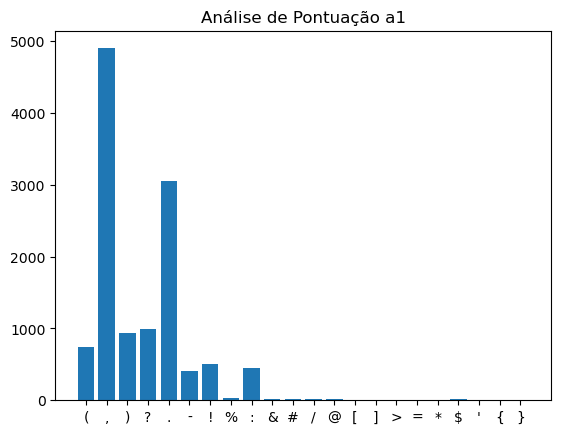

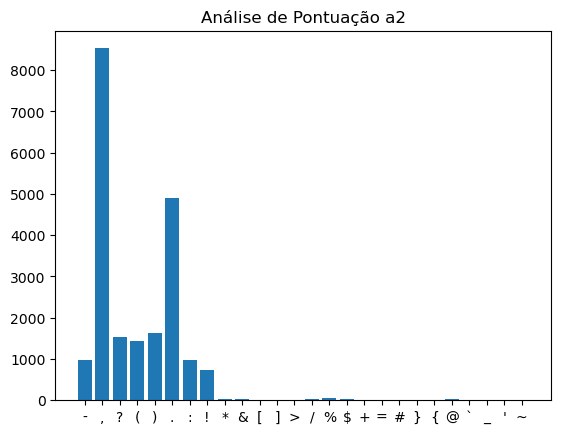

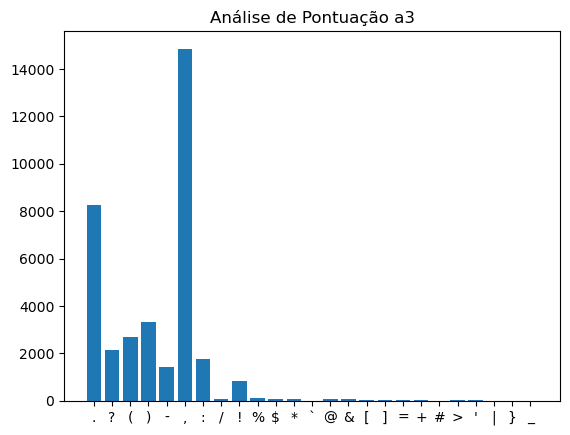

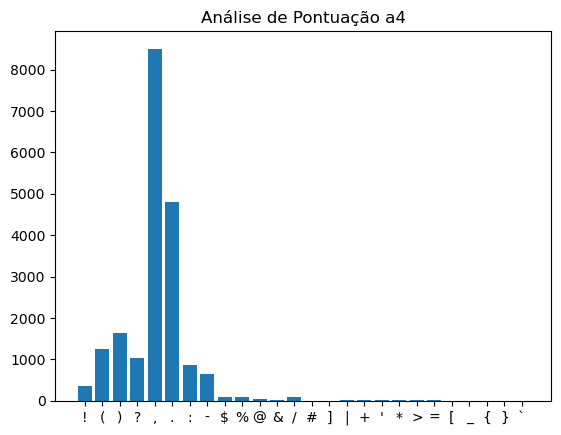

In [22]:
# Plotar gráficos
plotar_grafico(contagem_pontuacao_a1, "Análise de Pontuação a1")
plotar_grafico(contagem_pontuacao_a2, "Análise de Pontuação a2")
plotar_grafico(contagem_pontuacao_a3, "Análise de Pontuação a3")
plotar_grafico(contagem_pontuacao_a4, "Análise de Pontuação a4")

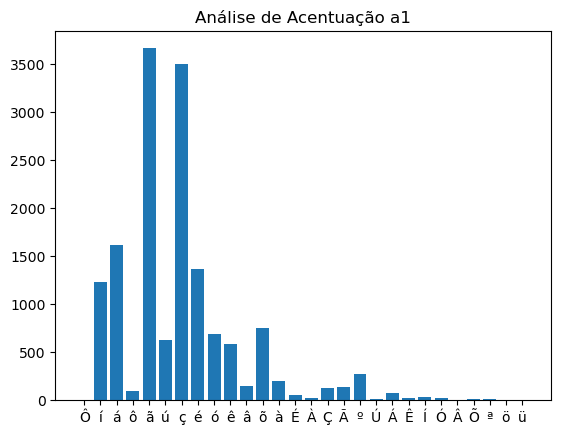

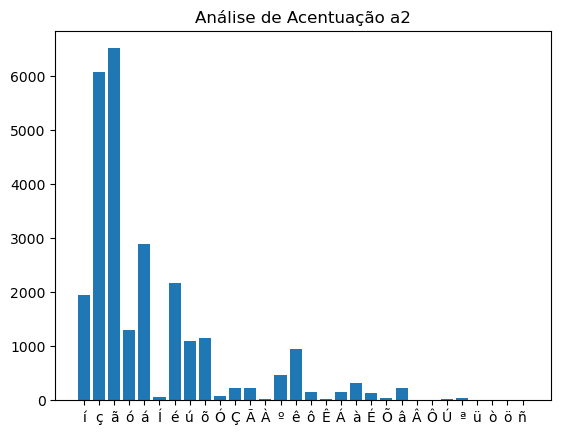

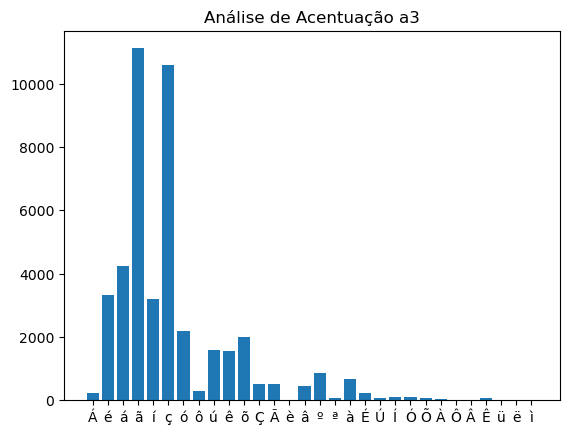

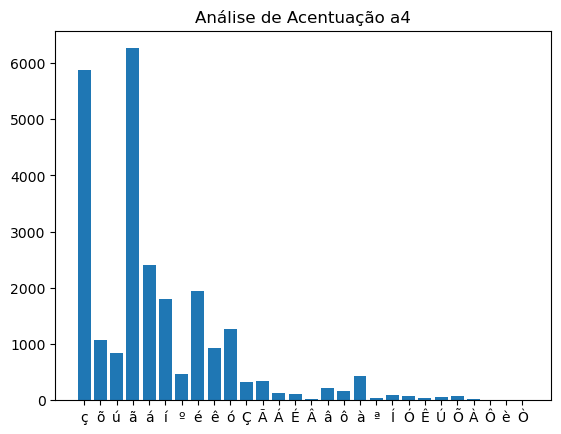

In [28]:
plotar_grafico(contagem_acentuacao_a1, "Análise de Acentuação a1")
plotar_grafico(contagem_acentuacao_a2, "Análise de Acentuação a2")
plotar_grafico(contagem_acentuacao_a3, "Análise de Acentuação a3")
plotar_grafico(contagem_acentuacao_a4, "Análise de Acentuação a4")

# Diversidade lexical

In [35]:
import pandas as pd

def calcular_diversidade_lexical_media(dataframe, coluna_texto):
    # Obter os textos da coluna especificada
    textos = dataframe[coluna_texto].astype(str)

    # Inicializar lista para armazenar as diversidades de cada texto
    diversidades = []

    # Iterar sobre os textos
    for texto in textos:
        # Tokenização
        palavras = texto.split()

        # Número total de palavras
        total_palavras = len(palavras)

        # Número de palavras únicas (tamanho do vocabulário)
        vocabulario = set(palavras)
        tamanho_vocabulario = len(vocabulario)

        # Razão de Tamanho do Vocabulário para o Número Total de Palavras (Type-Token Ratio)
        diversidade_lexical = tamanho_vocabulario / total_palavras

        diversidades.append(diversidade_lexical)

    # Calcular a média das diversidades
    diversidade_media = sum(diversidades) / len(diversidades) if diversidades else 0

    return diversidade_media

In [36]:
calcular_diversidade_lexical_media(a1, 'req_text')

0.8186031179821882

In [37]:
calcular_diversidade_lexical_media(a2, 'req_text')

0.816091051469776

In [38]:
calcular_diversidade_lexical_media(a3, 'req_text')

0.8104179324862475

In [39]:
calcular_diversidade_lexical_media(a4, 'req_text')

0.8334713669579085

# Comprimento médio das sentenças

In [52]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

# Baixe os recursos necessários do NLTK
nltk.download('punkt')

def calcular_comprimento_medio_e_desvio_padrao_sentencas(dataframe, coluna_texto):
    # Obter os textos da coluna especificada
    textos = dataframe[coluna_texto].astype(str)

    # Inicializar lista para armazenar os comprimentos de sentenças de cada texto
    comprimentos_sentencas = []

    # Iterar sobre os textos
    for texto in textos:
        # Tokenização em sentenças
        sentencas = sent_tokenize(texto)

        # Calcular o comprimento de cada sentença e armazenar na lista
        comprimentos_sentencas.extend([len(sentenca.split()) for sentenca in sentencas])

    # Calcular o comprimento médio de sentenças e desvio-padrão
    comprimento_medio = sum(comprimentos_sentencas) / len(comprimentos_sentencas) if comprimentos_sentencas else 0
    desvio_padrao = (sum((x - comprimento_medio) ** 2 for x in comprimentos_sentencas) / len(comprimentos_sentencas)) ** 0.5

    return comprimento_medio, desvio_padrao

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yagoa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
comprimento_medio, desvio_padrao = calcular_comprimento_medio_e_desvio_padrao_sentencas(a1, 'req_text')

print(f"Comprimento Médio de Sentenças: {comprimento_medio:.4f}")
print(f"Desvio-Padrão do Comprimento de Sentenças: {desvio_padrao:.4f}")

Comprimento Médio de Sentenças: 17.1314
Desvio-Padrão do Comprimento de Sentenças: 16.4607


In [54]:
comprimento_medio, desvio_padrao = calcular_comprimento_medio_e_desvio_padrao_sentencas(a2, 'req_text')

print(f"Comprimento Médio de Sentenças: {comprimento_medio:.4f}")
print(f"Desvio-Padrão do Comprimento de Sentenças: {desvio_padrao:.4f}")

Comprimento Médio de Sentenças: 17.9186
Desvio-Padrão do Comprimento de Sentenças: 18.6976


In [55]:
comprimento_medio, desvio_padrao = calcular_comprimento_medio_e_desvio_padrao_sentencas(a3, 'req_text')

print(f"Comprimento Médio de Sentenças: {comprimento_medio:.4f}")
print(f"Desvio-Padrão do Comprimento de Sentenças: {desvio_padrao:.4f}")

Comprimento Médio de Sentenças: 19.1957
Desvio-Padrão do Comprimento de Sentenças: 19.2499


In [56]:
comprimento_medio, desvio_padrao = calcular_comprimento_medio_e_desvio_padrao_sentencas(a4, 'req_text')

print(f"Comprimento Médio de Sentenças: {comprimento_medio:.4f}")
print(f"Desvio-Padrão do Comprimento de Sentenças: {desvio_padrao:.4f}")

Comprimento Médio de Sentenças: 19.9245
Desvio-Padrão do Comprimento de Sentenças: 21.0343


# Classes gramaticais

In [70]:
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

# Baixe os recursos necessários do NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def analisar_classes_gramaticais(dataframe, coluna_texto):
    # Obter os textos da coluna especificada
    textos = dataframe[coluna_texto].astype(str)

    # Inicializar um contador para cada classe gramatical
    contagem_classes_gramaticais = Counter()

    # Iterar sobre os textos
    for texto in textos:
        # Tokenização em palavras
        palavras = word_tokenize(texto)

        # Obter as classes gramaticais usando o pos_tag do NLTK
        classes_gramaticais = pos_tag(palavras)

        # Contar a ocorrência de cada classe gramatical
        contagem_classes_gramaticais.update(tag for _, tag in classes_gramaticais)

    return contagem_classes_gramaticais

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yagoa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yagoa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [75]:
# Analisar classes gramaticais para a coluna 'Texto'
contagem_classes_gramaticais = analisar_classes_gramaticais(a1, 'req_text')

# Exibir resultado
print("Contagem de Classes Gramaticais:")
for classe, contagem in contagem_classes_gramaticais.items():
    print(f"{classe}: {contagem}")

Contagem de Classes Gramaticais:
JJ: 7337
NNP: 15690
NN: 28730
TO: 249
DT: 3180
(: 745
,: 4902
VBP: 2836
): 937
.: 4535
NNPS: 9
NNS: 2090
IN: 3866
MD: 123
VB: 1689
FW: 9901
CC: 174
CD: 2312
$: 56
VBZ: 1655
:: 875
``: 90
'': 86
PDT: 20
RB: 791
VBD: 533
SYM: 9
JJR: 35
#: 13
PRP: 197
POS: 10
EX: 11
RP: 10
UH: 38
WRB: 1
VBN: 2
RBR: 1
VBG: 1
RBS: 1


In [76]:
contagem_classes_gramaticais = analisar_classes_gramaticais(a2, 'req_text')

# Exibir resultado
print("Contagem de Classes Gramaticais:")
for classe, contagem in contagem_classes_gramaticais.items():
    print(f"{classe}: {contagem}")

Contagem de Classes Gramaticais:
:: 1979
NN: 48887
VBZ: 2725
JJ: 11982
,: 8530
DT: 5096
NNP: 28247
.: 7156
IN: 6498
FW: 15696
CD: 4222
NNS: 3344
VBP: 4713
VB: 2883
VBD: 934
(: 1440
): 1645
TO: 438
JJS: 1
``: 249
MD: 197
PRP: 272
'': 250
RB: 1162
UH: 62
CC: 341
$: 84
JJR: 57
RP: 23
PDT: 17
SYM: 33
NNPS: 7
VBG: 6
EX: 11
#: 9
RBR: 4
POS: 13
VBN: 7
RBS: 5


In [77]:
contagem_classes_gramaticais = analisar_classes_gramaticais(a3, 'req_text')

# Exibir resultado
print("Contagem de Classes Gramaticais:")
for classe, contagem in contagem_classes_gramaticais.items():
    print(f"{classe}: {contagem}")

Contagem de Classes Gramaticais:
LS: 4
.: 11212
NNP: 47674
CD: 7433
(: 2691
): 3345
NN: 82225
:: 3348
VBP: 8267
,: 14856
JJ: 20639
NNS: 5542
RB: 1845
IN: 9899
VB: 5261
VBZ: 4847
DT: 8724
FW: 24611
MD: 398
PRP: 477
``: 391
'': 364
VBD: 1632
TO: 732
PDT: 27
RBR: 6
CC: 535
JJR: 134
EX: 18
$: 164
SYM: 72
POS: 67
VBN: 19
UH: 75
NNPS: 39
RP: 29
RBS: 3
#: 4
WP: 3
PRP$: 2
VBG: 11


In [78]:
contagem_classes_gramaticais = analisar_classes_gramaticais(a4, 'req_text')

# Exibir resultado
print("Contagem de Classes Gramaticais:")
for classe, contagem in contagem_classes_gramaticais.items():
    print(f"{classe}: {contagem}")

Contagem de Classes Gramaticais:
NNP: 28323
NN: 48887
.: 6168
VBZ: 2647
DT: 5062
FW: 13634
(: 1262
): 1645
JJ: 12052
IN: 5737
,: 8502
NNS: 3263
CD: 4411
:: 1608
VBP: 4877
VBD: 979
VB: 3356
$: 142
MD: 243
PRP: 397
``: 226
'': 233
RB: 991
TO: 449
CC: 243
JJR: 80
UH: 41
#: 4
POS: 22
RP: 17
PDT: 14
VBG: 10
VBN: 6
SYM: 31
EX: 13
RBR: 2
RBS: 2
PRP$: 1
NNPS: 7
WRB: 1
JJS: 1


In [69]:
import pandas as pd
import spacy

# Carregue o modelo de linguagem em português do spaCy
nlp = spacy.load("pt_core_news_sm")

def analisar_estrutura_frases(dataframe, coluna_texto):
    # Obter os textos da coluna especificada
    textos = dataframe[coluna_texto].astype(str)

    # Inicializar lista para armazenar métricas
    complexidades_sintaticas = []

    # Iterar sobre os textos
    for texto in textos:
        # Processar o texto com spaCy
        doc = nlp(texto)

        # Converter o gerador para uma lista para calcular o comprimento
        tokens = list(doc)

        # Calcular a complexidade sintática (número médio de dependências por palavra)
        complexidade_sintatica = sum(len(token.children) for token in tokens) / len(tokens) if len(tokens) > 0 else 0
        complexidades_sintaticas.append(complexidade_sintatica)

    # Calcular a média das complexidades sintáticas
    media_complexidades_sintaticas = sum(complexidades_sintaticas) / len(complexidades_sintaticas) if complexidades_sintaticas else 0

    return media_complexidades_sintaticas

# Exemplo de DataFrame
dados = {'Texto': ["Isso é um exemplo de texto. Uma frase aqui.", "Outro exemplo mais longo. Contém mais palavras e frases.", "Texto curto."]}
df = pd.DataFrame(dados)

# Analisar a estrutura de frases para a coluna 'Texto'
media_complexidades_sintaticas = analisar_estrutura_frases(df, 'Texto')

# Exibir resultado
print(f"Média da Complexidade Sintática: {media_complexidades_sintaticas:.2f}")


TypeError: object of type 'generator' has no len()